<hr style="border-color:#ff9900">
<hr style="border-color:#ff9900">
# <center> = Word2vec in Politics = </center>
<center>발표자 : 송치성 </center>
  
<hr style="border-color:#ff9900">
<hr style="border-color:#ff9900">

<br><br><br>
<hr style="border-color:#ff9900">
# Step 1. NLTK 초간단 실습 : 영문으로된 텍스트를 형태소 분석해보자.
<hr style="border-color:#ff9900">

http://www.nltk.org/

In [1]:
from __future__ import print_function, unicode_literals 

<br><br><br>
## 1. 문장 끝(EOS; End Of Sentence) 탐지
- 문서에서 각 문장을 인식

In [2]:
import nltk

In [3]:
txt= "Hello, it's me. I was wondering \
if after all these years. You'd like to \
meet, to go over everything. They \
say that time's supposed to heal ya."
txt

u"Hello, it's me. I was wondering if after all these years. You'd like to meet, to go over everything. They say that time's supposed to heal ya."

In [4]:
sentences = nltk.tokenize.sent_tokenize(txt)
sentences[0]

u"Hello, it's me."

In [5]:
sentences

[u"Hello, it's me.",
 u'I was wondering if after all these years.',
 u"You'd like to meet, to go over everything.",
 u"They say that time's supposed to heal ya."]

<br><br><br>
## 2. 토큰화(Tokenization)
- 각각의 문장을 토큰으로 분리.
- 한글의 __형태소__(의미를 가진 최소한의 단위)와 유사한 의미.

In [6]:
tokens = [nltk.tokenize.word_tokenize(sen) for sen in sentences]
tokens

[[u'Hello', u',', u'it', u"'s", u'me', u'.'],
 [u'I',
  u'was',
  u'wondering',
  u'if',
  u'after',
  u'all',
  u'these',
  u'years',
  u'.'],
 [u'You',
  u"'d",
  u'like',
  u'to',
  u'meet',
  u',',
  u'to',
  u'go',
  u'over',
  u'everything',
  u'.'],
 [u'They',
  u'say',
  u'that',
  u'time',
  u"'s",
  u'supposed',
  u'to',
  u'heal',
  u'ya',
  u'.']]

<br><br><br>
## 3. 품사(POS; part-of-speech) 태깅(Tagging)
- 토큰에 품사 부착
- POS에 대한 정보 : http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [7]:
pos_tagged_tokens =[nltk.pos_tag(t) for t in tokens]
pos_tagged_tokens

[[(u'Hello', 'NNP'),
  (u',', ','),
  (u'it', 'PRP'),
  (u"'s", 'VBZ'),
  (u'me', 'PRP'),
  (u'.', '.')],
 [(u'I', 'PRP'),
  (u'was', 'VBD'),
  (u'wondering', 'VBG'),
  (u'if', 'IN'),
  (u'after', 'IN'),
  (u'all', 'DT'),
  (u'these', 'DT'),
  (u'years', 'NNS'),
  (u'.', '.')],
 [(u'You', 'PRP'),
  (u"'d", 'MD'),
  (u'like', 'VB'),
  (u'to', 'TO'),
  (u'meet', 'VB'),
  (u',', ','),
  (u'to', 'TO'),
  (u'go', 'VB'),
  (u'over', 'IN'),
  (u'everything', 'NN'),
  (u'.', '.')],
 [(u'They', 'PRP'),
  (u'say', 'VBP'),
  (u'that', 'IN'),
  (u'time', 'NN'),
  (u"'s", 'POS'),
  (u'supposed', 'VBN'),
  (u'to', 'TO'),
  (u'heal', 'VB'),
  (u'ya', 'NN'),
  (u'.', '.')]]

<br><br><br><br><br><br>
<hr style="border-color:#ff9900">
# Step 2. KonlPy 간단 실습 : 한글도 다뤄보자.
<hr style="border-color:#ff9900">

<br><br><br>
## 1. 한글 텍스트 데이터 불러오기

- 실습할 데이터 : http://data.popong.com/?python#statement

In [8]:
import konlpy
import konlpy.corpus
from konlpy.utils import pprint

In [9]:
url_list = []
for i in xrange(1,100):
    url= "http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=%d" %i
    url_list.append(url)    
print(url_list[:10])

[u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=1', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=2', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=3', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=4', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=5', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=6', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=7', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=8', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=9', u'http://api.popong.com/v0.2/statement/?api_key=test&per_page=100&page=10']


In [10]:
import requests

In [11]:
items=[]
for url in url_list:
    res = requests.get(url).json()
    items.extend(res['items'])

In [12]:
len(items)

9900

In [13]:
items[:10]

[{u'content': u'\uadf8\ub798\uc11c \uc9c0\uae08 \uad6d\ud68c \ub610 \uc5ec\uc57c \uc815\ub2f9, \uc2dc\ubbfc\ub2e8\uccb4\uc640\uc758 \uc18c\ud1b5\uc774 \uc8fc \uc5c5\ubb34\ub2e4 \uc774\ub807\uac8c \ub418\uc5b4 \uc788\ub294\ub370, \uc800\ub294 \u2018\uc815\ub2f9\uacfc\uc758 \uc18c\ud1b5\uc5d0\uc11c \uc911\uc694\ud55c \uac83\uc740 \uc57c\ub2f9\uacfc\uc758 \uc18c\ud1b5\uc774\ub2e4\u2019 \uc774\ub807\uac8c \uc0dd\uac01\uc744 \ud569\ub2c8\ub2e4. \u2018\uc5ec\ub2f9\ubcf4\ub2e4\ub3c4 \uc57c\ub2f9\uacfc \ub354 \ub9ce\uc774 \uc18c\ud1b5\ud574\uc57c \ub41c\ub2e4\u2019 \uadf8\ub7f0 \uc0dd\uac01\uc744 \ud558\ub294\ub370, \uc5b4\ub5a0\uc2e0\uac00\uc694?',
  u'date': u'2012-07-30',
  u'id': 1132004,
  u'meeting_id': 19309331788,
  u'person_id': 19561109,
  u'sequence': 917,
  u'speaker': u'\ud64d\uc77c\ud45c \uc704\uc6d0',
  u'url': u'http://pokr.kr/meeting/19309331788/dialog#1132004'},
 {u'content': u'\uc608, \uc800\ub3c4 \uadf8\ub807\uac8c \uc0dd\uac01\ud558\uace0 \uc788\uc2b5\ub2c8\ub2e4.',
  u'da

In [14]:
pprint(items[:10])

[{content: 그래서 지금 국회 또 여야 정당, 시민단체와의 소통이 주 업무다 이렇게 되어 있는데, 저는 ‘정당과의 소통에서 중요한 것은 야당과의 소통이다’ 이렇게 생각을 합니다. ‘여당보다도 야당과 더 많이 소통해야 된다’ 그런 생각을 하는데, 어떠신가요?,
  date: 2012-07-30,
  id: 1132004,
  meeting_id: 19309331788,
  person_id: 19561109,
  sequence: 917,
  speaker: 홍일표 위원,
  url: http://pokr.kr/meeting/19309331788/dialog#1132004},
 {content: 예, 저도 그렇게 생각하고 있습니다.,
  date: 2012-07-30,
  id: 1132005,
  meeting_id: 19309331788,
  person_id: None,
  sequence: 918,
  speaker: 특임장관 고흥길,
  url: http://pokr.kr/meeting/19309331788/dialog#1132005},
 {content: 그러면 현재 업무가 그런 생각대로 진행되고 계신지, 혹시……,
  date: 2012-07-30,
  id: 1132006,
  meeting_id: 19309331788,
  person_id: 19561109,
  sequence: 919,
  speaker: 홍일표 위원,
  url: http://pokr.kr/meeting/19309331788/dialog#1132006},
 {content: 지금 솔직히 제가 장관 취임한 이후로 여야 지도자를 뵙고 한 것도 야당의 경우가 좀 많습니다. 한 가지 아쉬운 것은 저희 특임실이 1․2․3 조정관으로 되어 있는데, 제1조정관 밑에 여야를 맡는 과장으로 되어 있습니다, 과장급으로. 그래서 조정관실을 하나 늘려서 여당을 맡는 조정관, 야당을 맡는 조정관 이렇게 해서 확대하고 싶은데, 그게 사실은 정부의 소위 말해서 정원 조정이라든가 또는 예산 절감

In [31]:
pprint(items[10]['content'])

계속 애써 주십시오. 이상입니다.


<br><br><br>
## 2. 품사 태깅(POS Tagging)
- Korean POS tags comparison chart : https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

In [32]:
# 메캅 형태소 분석기
from konlpy.tag import Mecab
mecab = Mecab()

In [33]:
test_statement = items[10]['content']
pprint(test_statement)

계속 애써 주십시오. 이상입니다.


In [34]:
pprint(mecab.pos(test_statement))

[(계속, MAG),
 (애써, VV+EC),
 (주, VX),
 (십시오, EP+EF),
 (., SF),
 (이상, NNG),
 (입니다, VCP+EF),
 (., SF)]


<br><br><br>
## 3. 어떤 단어가 많이 사용되었는지 단어 빈도 플롯 살펴보기
- 참고 : https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words

In [35]:
# (돈, Noun) -> "돈/Noun" 형태로 형태소 분석.
def tokenizer_mecab(doc):
    return ['/'.join(t) for t in mecab.pos(doc)]

In [36]:
pprint(tokenizer_mecab(test_statement))

[계속/MAG,
 애써/VV+EC,
 주/VX,
 십시오/EP+EF,
 ./SF,
 이상/NNG,
 입니다/VCP+EF,
 ./SF]


In [37]:
# Import various modules for string cleaning
from bs4 import BeautifulSoup
import re

In [38]:
# 단어 리스트 형태로 만듦.
def review_to_wordlist(statement):
    try:
        statement_text = BeautifulSoup(statement.strip()).get_text()
    except AttributeError, e:
        print(e)
        review_text = ""
    statement_words = tokenizer_mecab(statement_text)
    return statement_words

In [39]:
words=[]
statement_num=0
for item in items:
    words += review_to_wordlist(item['content'])
    statement_num += 1
    if statement_num%1000==0:
        print("statement_num : %d" % statement_num)

statement_num : 1000
statement_num : 2000
statement_num : 3000
statement_num : 4000
statement_num : 5000
statement_num : 6000
statement_num : 7000
statement_num : 8000
statement_num : 9000


In [40]:
len(words)

587920

In [41]:
pprint(words[:10])

[그래서/MAJ,
 지금/MAG,
 국회/NNG,
 또/MAG,
 여야/NNG,
 정당/NNG,
 ,/SC,
 시민/NNG,
 단체/NNG,
 와/JKB]


In [42]:
import nltk
words_nltk = nltk.Text(words, name="words in statement")

In [43]:
# 많이 쓰인 단어 보여줌. 상위 10개의 단어.
pprint(words_nltk.vocab().most_common(10))

[(./SF, 18363),
 (에/JKB, 12930),
 (을/JKO, 12777),
 (고/EC, 10547),
 (이/JKS, 10468),
 (,/SC, 10223),
 (하/XSV, 9483),
 (는/ETM, 8451),
 (가/JKS, 8334),
 (습니다/EF, 7798)]


In [44]:
import matplotlib
matplotlib.rc('font',family='AppleGothic') # 기본 폰트로는 한글 폰트가 깨지기 떄문에 임의로 지정해줌. 

In [45]:
%matplotlib inline 

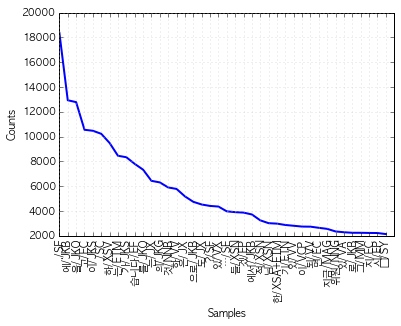

In [46]:
words_nltk.plot(40) # 가장 많이쓰인 상위 40개의 단어

### Naive하게 불용어(stop words)처리
- 조사(~에, ~로), 구두점(.)같은 의미없는 단어들 제거. 

In [47]:
# 품사 중 일반명사, 고유명사, 동사, 형용사 만 추출해봄.
Non_Stop_words = ["NNG", "NNP","VV","VA"]

In [48]:
words_new = [w for w in words if w.split("/")[-1] in Non_Stop_words]
pprint(words_new[:10])

[국회/NNG,
 여야/NNG,
 정당/NNG,
 시민/NNG,
 단체/NNG,
 소통/NNG,
 주/NNG,
 업무/NNG,
 되/VV,
 정당/NNG]


In [49]:
words_nltk_new = nltk.Text(words_new, name="new words in statement")

In [50]:
# 많이 쓰인 단어 보여줌. 상위 10개의 단어.
pprint(words_nltk_new.vocab().most_common(20))

[(하/VV, 5777),
 (있/VV, 2806),
 (되/VV, 2734),
 (위원/NNG, 2347),
 (있/VA, 2284),
 (말씀/NNG, 2058),
 (생각/NNG, 1805),
 (없/VA, 1698),
 (문제/NNG, 1663),
 (부분/NNG, 1424),
 (보/VV, 1244),
 (그렇/VA, 1071),
 (정부/NNG, 1015),
 (같/VA, 1013),
 (다음/NNG, 989),
 (때/NNG, 938),
 (사업/NNG, 920),
 (드리/VV, 829),
 (관련/NNG, 806),
 (알/VV, 797)]


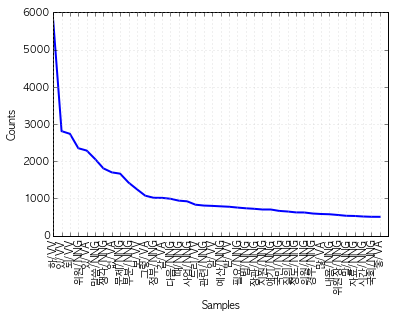

In [52]:
words_nltk_new.plot(40) # 가장 많이쓰인 상위 40개의 단어


<br><br><br><br><br>
<hr style="border-color:#ff9900">
# Step 3. Word2vec 실습 : 벡터 표현도 해보자.
<hr style="border-color:#ff9900">

<br><br><br>
## 1. 형태소 분석
- 포맷 : [ ["word1/pos1", "word2/pos2", "word3/pos3", ... ], ["word4/pos4", "word5/pos5", ... ], ... ] 

In [53]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
# Define a function to split a review into parsed sentences
def statement_to_sentences( statement, remove_stopwords=False ):
    raw_sentences = tokenizer.tokenize(statement.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call review_to_wordlist to get a list of words
            sentences.append( statement_to_wordlist( statement, remove_stopwords ))
    #
    # Return the list of sentences (each sentence is a list of words,
    # so this returns a list of lists
    return sentences

In [54]:
def statement_to_wordlist( statement, remove_stopwords=False ):
    words = tokenizer_mecab(statement)
    if remove_stopwords:
        words_new = [w for w in words if w.split("/")[-1] in Non_Stop_words]
    return(words_new)

In [55]:
import time # 작업시간 검사용!!
sentences=[]
statement_num=0
start = time.time() # 작업시간 검사용!
for item in items:
    sentences += statement_to_sentences(item['content'], remove_stopwords=True)
    statement_num += 1
    if statement_num%1000==0:
        print("statement_num : %d" % statement_num)
end = time.time()
print(end-start)

statement_num : 1000
statement_num : 2000
statement_num : 3000
statement_num : 4000
statement_num : 5000
statement_num : 6000
statement_num : 7000
statement_num : 8000
statement_num : 9000
48.1018049717


In [56]:
len(sentences) #총 이만큼의 문장

24359

In [57]:
pprint(sentences[:10])

[[국회/NNG,
  여야/NNG,
  정당/NNG,
  시민/NNG,
  단체/NNG,
  소통/NNG,
  주/NNG,
  업무/NNG,
  되/VV,
  정당/NNG,
  소통/NNG,
  중요/NNG,
  야당/NNG,
  소통/NNG,
  생각/NNG,
  여당/NNG,
  야당/NNG,
  소통/NNG,
  생각/NNG,
  하/VV],
 [국회/NNG,
  여야/NNG,
  정당/NNG,
  시민/NNG,
  단체/NNG,
  소통/NNG,
  주/NNG,
  업무/NNG,
  되/VV,
  정당/NNG,
  소통/NNG,
  중요/NNG,
  야당/NNG,
  소통/NNG,
  생각/NNG,
  여당/NNG,
  야당/NNG,
  소통/NNG,
  생각/NNG,
  하/VV],
 [그렇/VA, 생각/NNG],
 [업무/NNG, 생각/NNG, 진행/NNG],
 [장관/NNG,
  취임/NNG,
  이후/NNG,
  여야/NNG,
  지도자/NNG,
  뵙/VV,
  야당/NNG,
  경우/NNG,
  많/VA,
  특임/NNG,
  실/NNG,
  조정관/NNG,
  되/VV,
  조정관/NNG,
  밑/NNG,
  여야/NNG,
  맡/VV,
  과장/NNG,
  되/VV,
  과장/NNG,
  급/NNG,
  조정관/NNG,
  실/NNG,
  여당/NNG,
  맡/VV,
  조정관/NNG,
  야당/NNG,
  맡/VV,
  조정관/NNG,
  확대/NNG,
  정부/NNG,
  소위/NNG,
  말/NNG,
  정원/NNG,
  조정/NNG,
  예산/NNG,
  절감/NNG,
  하/VV,
  이루/VV,
  아쉬움/NNG],
 [장관/NNG,
  취임/NNG,
  이후/NNG,
  여야/NNG,
  지도자/NNG,
  뵙/VV,
  야당/NNG,
  경우/NNG,
  많/VA,
  특임/NNG,
  실/NNG,
  조정관/NNG,
  되/VV,
  조정관/NNG,
  밑/NNG,
  여야/NNG,
  맡/VV,
  과장/NNG,
  되/

<br><br><br>
## 2. Gensim을 이용하여 word2vec 모델링

In [58]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [74]:
# Set parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 40   # Minimum word count                        
num_workers = 8       # Number of threads to run in parallel
context = 3          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
negative = 5
iter = 5 # 얼마나 반복할지.

In [ ]:
# 오오오오오래 걸립니다.
import time
start = time.time() # 작업시간 검사용!
# Initialize and train the model (this will take some time)
print("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, negative=negative, iter=iter)
end = time.time()
print(end-start)

In [ ]:
# 모델 이름 지정과 저장.
model_name = "politics_practice_w2v_model"
model.save(model_name)

In [60]:
# 모델 로드.
model= word2vec.Word2Vec.load("politics_practice_w2v_model")

In [61]:
# 단어의 총 갯수 : 15365
# 차원의 수: 100
model.syn0.shape

(4761, 300)

In [90]:
pprint(model.index2word[:100])

[하/VV,
 있/VV,
 되/VV,
 있/VA,
 위원/NNG,
 생각/NNG,
 보/VV,
 없/VA,
 추진/NNG,
 말씀/NNG,
 지원/NNG,
 사업/NNG,
 문제/NNG,
 국민/NNG,
 국회/NNG,
 정부/NNG,
 부분/NNG,
 기상/NNG,
 다음/NNG,
 강화/NNG,
 경제/NNG,
 정책/NNG,
 위원회/NNG,
 관련/NNG,
 필요/NNG,
 같/VA,
 계획/NNG,
 관리/NNG,
 드리/VV,
 업무/NNG,
 때/NNG,
 금융/NNG,
 정보/NNG,
 기관/NNG,
 운영/NNG,
 감사/NNG,
 받/VV,
 산업/NNG,
 얘기/NNG,
 환경/NNG,
 내용/NNG,
 사회/NNG,
 확대/NNG,
 관계/NNG,
 법/NNG,
 국가/NNG,
 의원/NNG,
 장관/NNG,
 남북/NNP,
 경우/NNG,
 검찰/NNG,
 자료/NNG,
 주요/NNG,
 농협/NNG,
 이상/NNG,
 개선/NNG,
 위원장/NNG,
 보고/NNG,
 노력/NNG,
 제도/NNG,
 의견/NNG,
 많/VA,
 사항/NNG,
 그렇/VA,
 말/NNG,
 발전/NNG,
 역할/NNG,
 일/NNG,
 시장/NNG,
 체계/NNG,
 규제/NNG,
 구축/NNG,
 들/VV,
 회의/NNG,
 지역/NNG,
 방안/NNG,
 앞/NNG,
 대책/NNG,
 투자/NNG,
 논의/NNG,
 규정/NNG,
 기업/NNG,
 개정/NNG,
 사람/NNG,
 예산/NNG,
 책임/NNG,
 농업/NNG,
 시간/NNG,
 검토/NNG,
 법률/NNG,
 검사/NNG,
 협력/NNG,
 경영/NNG,
 북한/NNP,
 적극/NNG,
 대통령/NNG,
 가능/NNG,
 마련/NNG,
 결과/NNG,
 활성/NNG]


In [63]:
# '말뚝'이라는 단어를 다음과 같은 차원의 벡터로 표현
model.syn0[0]

array([ -1.47909924e-01,  -7.82150149e-01,  -5.86681604e-01,
         1.43620670e-01,   6.93234086e-01,  -7.59242997e-02,
         8.01609382e-02,  -5.65707922e-01,   5.37818857e-02,
         6.27997398e-01,   2.66087711e-01,  -6.70137584e-01,
         4.84786719e-01,   2.08454818e-01,  -5.67235649e-01,
         7.84928948e-02,  -3.22420269e-01,   2.84408897e-01,
        -1.94810316e-01,   7.21034229e-01,   4.68174815e-01,
        -3.86944324e-01,  -6.63727105e-01,   9.35649931e-01,
         6.85643554e-02,   1.33880228e-01,  -1.39867559e-01,
        -3.31048131e-01,   3.60361904e-01,   9.08293054e-02,
        -8.97422910e-01,  -3.76543790e-01,   1.52054474e-01,
         2.96178997e-01,   1.15075099e+00,  -5.54219782e-01,
        -3.92962128e-01,  -5.92292063e-02,  -7.42027581e-01,
         1.94358379e-01,   4.19271052e-01,   8.38106871e-01,
         8.35288882e-01,   7.43719414e-02,  -8.87508392e-01,
         5.08480407e-02,   3.58087480e-01,   1.85043514e-02,
        -7.31472194e-01,

<br><br><br><br>
## 3. word2vec 모델 갖고 놀기

In [123]:
# 벡터연산 테스트.
# 만들어진 word2vec 모델 내에서 '대통령'과 가까운(유사한) 상위 10개의 단어는? 
pprint(model_w2v.most_similar(positive=[u'대통령/NNG'], topn=10))

[(박근혜/NNP, 0.4057735204696655),
 (정권/NNG, 0.4022708237171173),
 (대변/NNG, 0.40089648962020874),
 (무성/NNG, 0.39541900157928467),
 (총장/NNG, 0.38894909620285034),
 (후보/NNG, 0.38517260551452637),
 (캠프/NNG, 0.38299304246902466),
 (수부/NNG, 0.37983494997024536),
 (한마디/NNG, 0.3769814372062683),
 (시절/NNG, 0.3707171082496643)]


In [146]:
pprint(model_w2v.most_similar(positive=[u'김무성/NNP'], topn=10))

[(하금열/NNP, 0.9181845188140869),
 (변호인/NNG, 0.6053225994110107),
 (거짓말/NNG, 0.5920188426971436),
 (고소/NNG, 0.5841341018676758),
 (대포통장/NNP, 0.5483880043029785),
 (혐의/NNG, 0.5432391166687012),
 (수뇌부/NNG, 0.5326563119888306),
 (덮/VV, 0.5249772667884827),
 (총장/NNG, 0.5150822997093201),
 (무성/NNG, 0.5131994485855103)]


In [ ]:
# 다음 중 다른 한명은? 
pprint(model_w2v.doesnt_match(u'이명박/NNP 김무성/NNP 박근혜/ㅜNNP 노무현/NNP'.split()))

In [122]:
# 어머니 - 엄마 = ??? - 아빠 => po: 어머니, 아빠  //  ne: 엄마
#pprint(model_w2v.most_similar(positive=[u'박근혜/NNP',u'시위/NNG'], negative=[u'노무현/NNP'], topn=5))

<br><br><br><br>
## 4. t-SNE로 차원축소 및 시각화
- 앞서 만든 word2vec 모델은 기존 1-hot 벡터표현법에 비해 차원(dimension)이 상당히 줄어들었지만, 그래도 300차원..
- 이를 평면상에 시각화해보기 위해서는 t-SNE를 이용하여 차원을 2차원으로 축소해야함.
- t-SNE는 scikit-learn에서 제공.

In [76]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [77]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000) 
# 여기서 중요한 것은 n_components만큼 차원을 축소함. Cartarian 좌표계로 시각화하기 위해 2차원으로 축소.

In [78]:
# numpy객체 출력시 소숫점 출력안함
np.set_printoptions(suppress=True)

In [79]:
vectors = model.syn0
labels = model.index2word

In [80]:
# 이것도 오오오오오오래걸림...
import time
start = time.time();
vectors_simple = tsne.fit_transform(vectors)
end = time.time();
print(end -start)

162.075868845


In [81]:
# 차원축소된 벡터 저장.
#with open('vectors_simple.txt', 'w') as f:
#    pickle.dump(vectors_simple, f)

In [82]:
from bokeh.plotting import figure, show, output_notebook, output_file


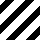
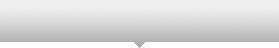
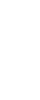
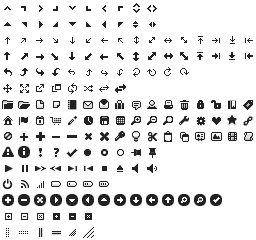
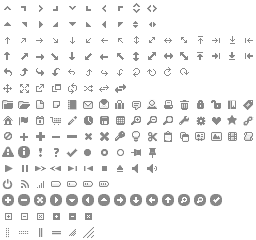
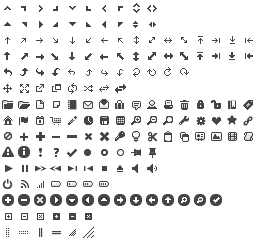
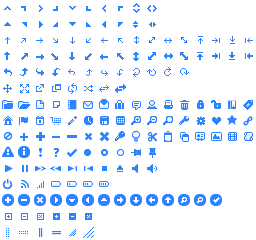
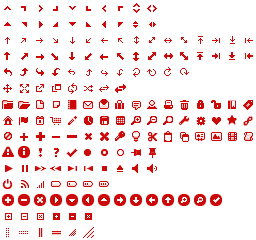
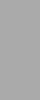
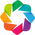
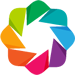
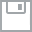
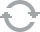
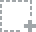
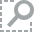
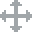
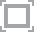
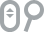

In [83]:
#output_file("word2vec_tsne.html") # 시각화 결과물을 "word2vec_tsne.html" 이름으로 export
output_notebook() # 시각화 결과물을 jupyter 노트북에 보여줌.

In [84]:
from bokeh.models import HoverTool, ColumnDataSource

source = ColumnDataSource(
        data=dict(
            x=vectors_simple.T[0],
            y=vectors_simple.T[1],
            word=labels,
        )
    )


hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("word", "@word"),
        ]
    )
TOOLS = "pan,wheel_zoom,box_zoom,reset,resize"

In [85]:
p = figure(plot_width=700, plot_height=700, tools=[TOOLS,hover], title="Words of Univ Students")
p.circle('x', 'y', size=7, source=source, alpha=0.4, fill_color="red", line_color="#ff9900")

show(p)